#A Notebook to practice ML basics

In this practicum, we practice some basic excercies in machine learning to warm up for more serious work.


In [8]:
#Import packages and define a few custom functions
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import graphviz
import pylab
import matplotlib.pyplot as plt
import random
import os
from sklearn import datasets

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

## Training: Building a Decision Tree Classifier

The cell below loads a standard sklearn toy dataset. It trains a decision tree classifier.
We provide two classification datasets that could be applied to the decision tree algorithms.


Before training your classifier, run the cell below to take a look at the dataset.

In [2]:

iris = datasets.load_iris()
print(iris.keys())
label_name = "type of iris plant"
print(iris.target_names)
labels = [iris.target_names[x] for x in iris.target]

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']


Let's define and fit a simple tree classifier

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, labels)

## Visualizing a Decision Tree

The following cell will generate a visualization of the decision tree.

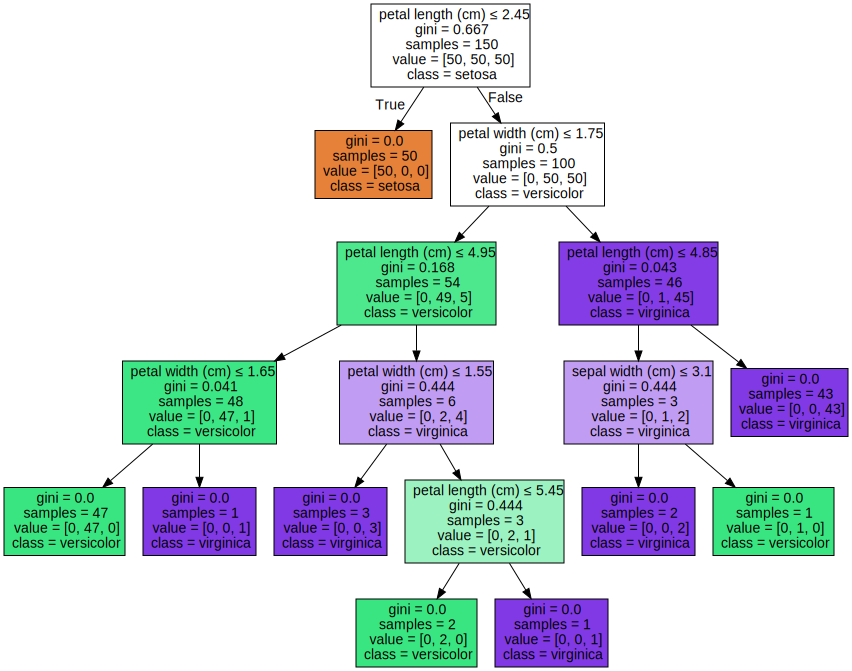

In [4]:
dot_data = tree.export_graphviz(clf, out_file=None,max_depth=5, \
feature_names=iris.feature_names,class_names=clf.classes_,label='all', \
filled=True,special_characters=True)

graph = graphviz.Source(dot_data)
graph

## Evaluating the Accuracy of a Decision Tree Classifier¶

The following cell will run cross-validation (k-fold, where k=5) to evaluate your decision tree classifier.

K Fold Cross-Validation is used to estimate prediction error. The dataset is randomly divided into K folds. The first fold acts as the validation set while the method is fit on remaining K-1 folds. Mean Squared Error is calculated on the observations from the held-out fold. The process is repeated K times, taking a different part each time.

In [5]:
n_foldCV = 5
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(iris.data,iris.target)
scores = cross_val_score(clf, iris.data, labels, cv=n_foldCV)

The following cell will output the accuracy score for each fold and the accuracy estimate of the model under 95% confidence interval.

In [6]:
print("Scores:")
[print(score) for score in scores]
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:
0.9333333333333333
0.9666666666666667
0.9
0.8666666666666667
1.0
Accuracy: 0.93 (+/- 0.09)


Can you calculate the precision, recall and f-1 scores? Please write the code in the following block

In [25]:
#your code here
from sklearn.metrics import make_scorer, precision_recall_fscore_support, precision_score, recall_score, f1_score
precision_scorer = make_scorer(precision_score, average='weighted')  # Or 'macro', 'micro', etc.
recall_scorer = make_scorer(recall_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')
scoring = {
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer
}
scores = cross_validate(clf, iris.data, labels, cv=n_foldCV, scoring=scoring)
print("Precision:", scores['test_precision'])
print("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision'].mean(), scores['test_precision'].std() * 2))
print("Recall:", scores['test_recall'])
print("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall'].mean(), scores['test_recall'].std() * 2))
print("F1-score:", scores['test_f1'])
print("F1-score: %0.2f (+/- %0.2f)" % (scores['test_f1'].mean(), scores['test_f1'].std() * 2))


Precision: [0.93333333 0.96969697 0.9023569  0.86666667 1.        ]
Precision: 0.93 (+/- 0.09)
Recall: [0.93333333 0.96666667 0.9        0.86666667 1.        ]
Recall: 0.93 (+/- 0.09)
F1-score: [0.93333333 0.96658312 0.89974937 0.86666667 1.        ]
F1-score: 0.93 (+/- 0.09)


In [22]:
cv_results

{'fit_time': array([0.00160527, 0.00129914, 0.00139332, 0.00128627, 0.00134683]),
 'score_time': array([0.00712419, 0.00609279, 0.00615811, 0.00636697, 0.0065043 ]),
 'test_precision': array([0.93333333, 0.96969697, 0.9023569 , 0.86666667, 1.        ]),
 'test_recall': array([0.93333333, 0.96666667, 0.9       , 0.86666667, 1.        ]),
 'test_f1': array([0.93333333, 0.96658312, 0.89974937, 0.86666667, 1.        ])}

Let's visualize the data by two feauters - you can see that this is a pretty easy task

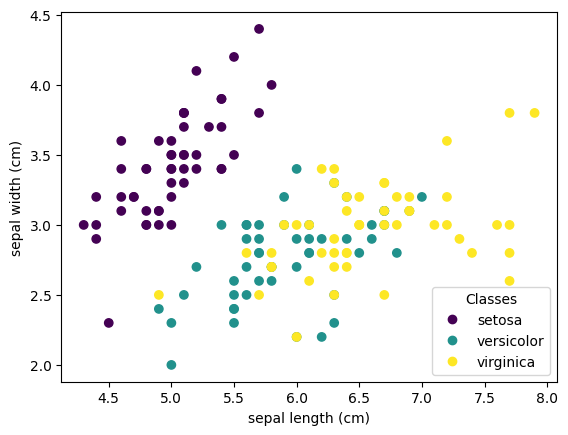

In [ ]:

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

Now, let's try to do the same task with a kNN classifier

In [ ]:
n_foldCV = 5
neigh = KNeighborsClassifier(n_neighbors=1)

neigh = neigh.fit(iris.data,iris.target)
scores = cross_val_score(neigh, iris.data, labels, cv=n_foldCV)
print("Scores:")
[print(score) for score in scores]
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:
0.9666666666666667
0.9666666666666667
0.9333333333333333
0.9333333333333333
1.0
Accuracy: 0.96 (+/- 0.05)


Let's add some noise and see what happens

In [ ]:
iris.data += np.random.normal(0, .5, iris.data.shape)

Let's repeat the same task with the noisy data

In [ ]:
n_foldCV = 5
neigh = KNeighborsClassifier(n_neighbors=10)

neigh = neigh.fit(iris.data,iris.target)
scores = cross_val_score(neigh, iris.data, labels, cv=n_foldCV)
print("Scores:")
[print(score) for score in scores]
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:
0.9
0.8666666666666667
0.8333333333333334
0.9
0.9
Accuracy: 0.88 (+/- 0.05)


Now let's visualize the decision boundaries of kNN; play with the valye of k in kNN and see what happens

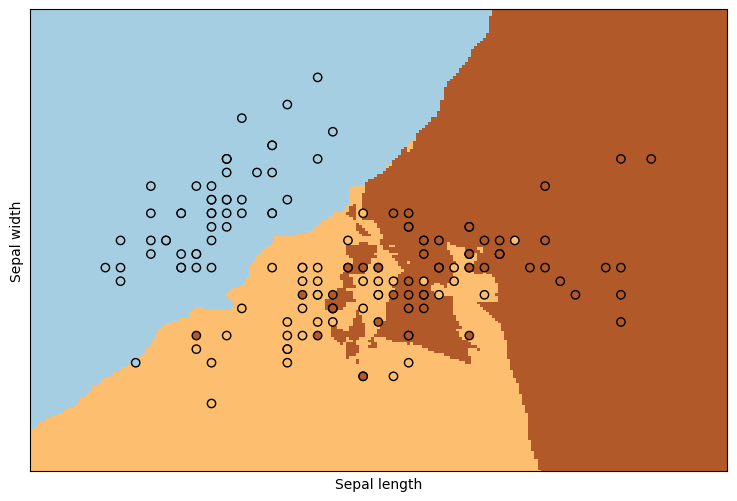

In [ ]:
# Code source: Gael Varoqueux
# Modified for Documentation merge by Jaques Grobler
# License: BSD


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features.
Y = iris.target

h = .02 # step size in the mesh

knn=KNeighborsClassifier(n_neighbors=5)

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(9, 6))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Now let's try a different task. We generate some synthetic sequential data

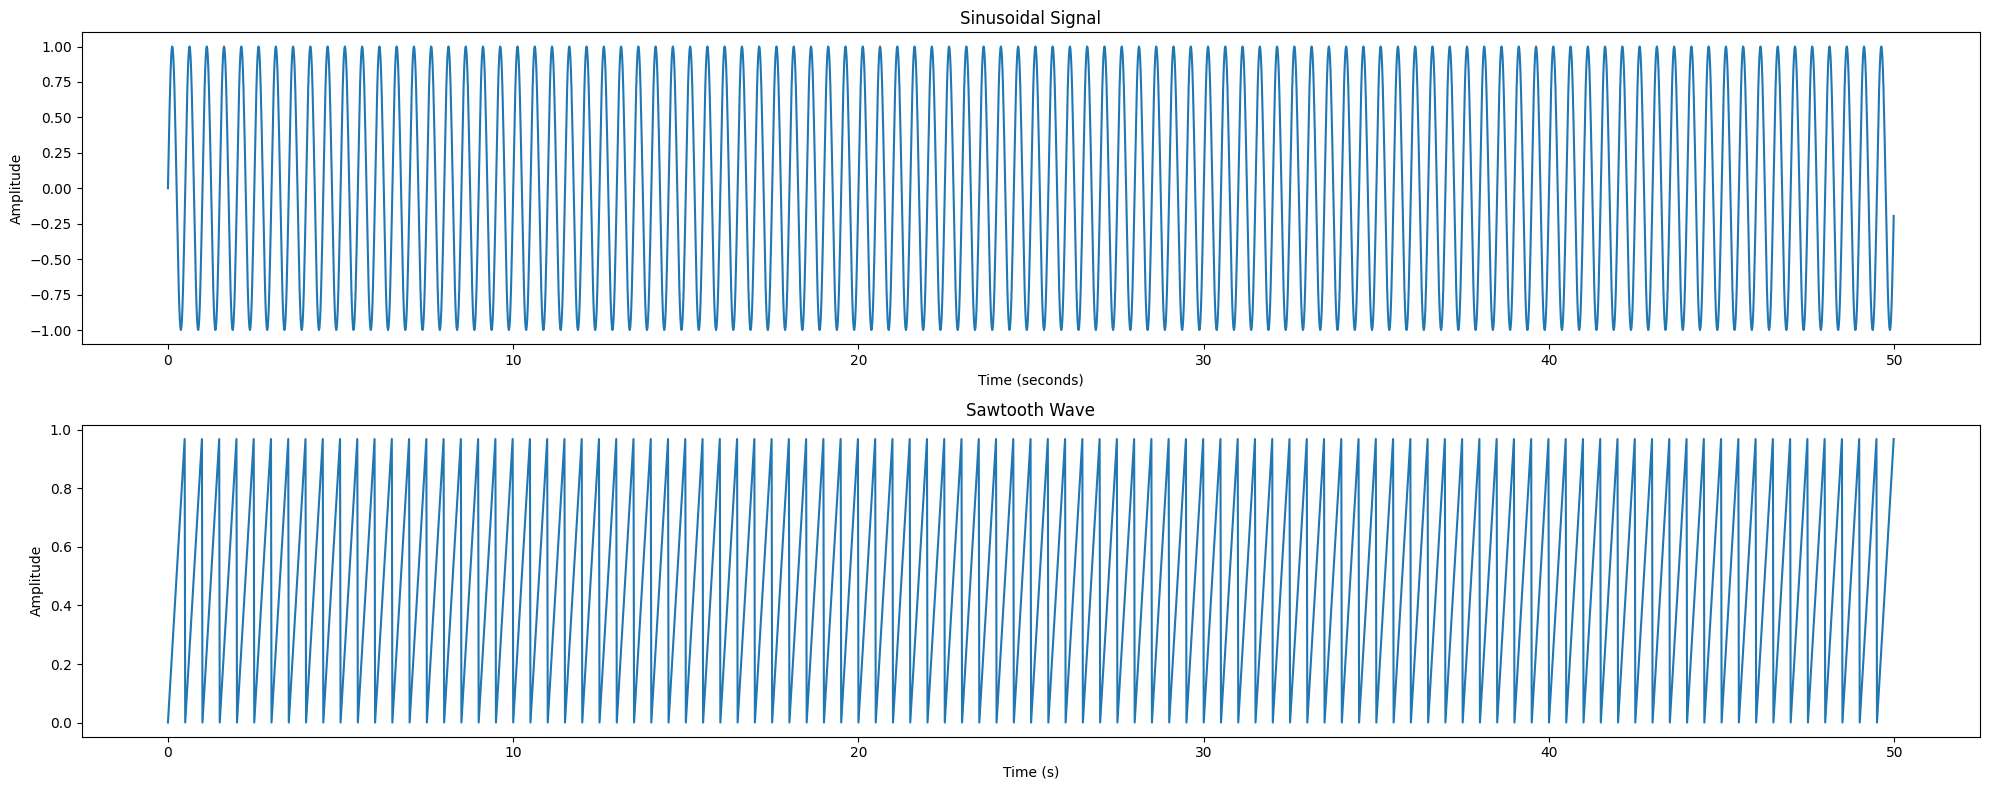

In [ ]:
# Set parameters for the signal
frequency = 2  # Hz (can be adjusted as needed)
amplitude = 1  # (can be adjusted as needed)
duration = 50  # seconds (can be adjusted as needed)
sample_rate = 64  # Hz

# Generate time values for the signal
time = np.arange(0, duration, 1/sample_rate)

# Generate the sinusoidal signal
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

fig, axs = plt.subplots(2, 1, figsize=(20, 8))
# Plot the sine wave
axs[0].plot(time, sine_wave)
axs[0].set_xlabel("Time (seconds)")
axs[0].set_ylabel("Amplitude")
axs[0].set_title("Sinusoidal Signal")


# Generate sawtooth wave
sawtooth_wave = np.mod(time * frequency, 1)

# Plot the sawtooth wave
axs[1].plot(time, sawtooth_wave)
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude")
axs[1].set_title("Sawtooth Wave")
plt.tight_layout()

plt.show()

now let's generate some synthetic sequential samples from these two signals - we add some noise as well

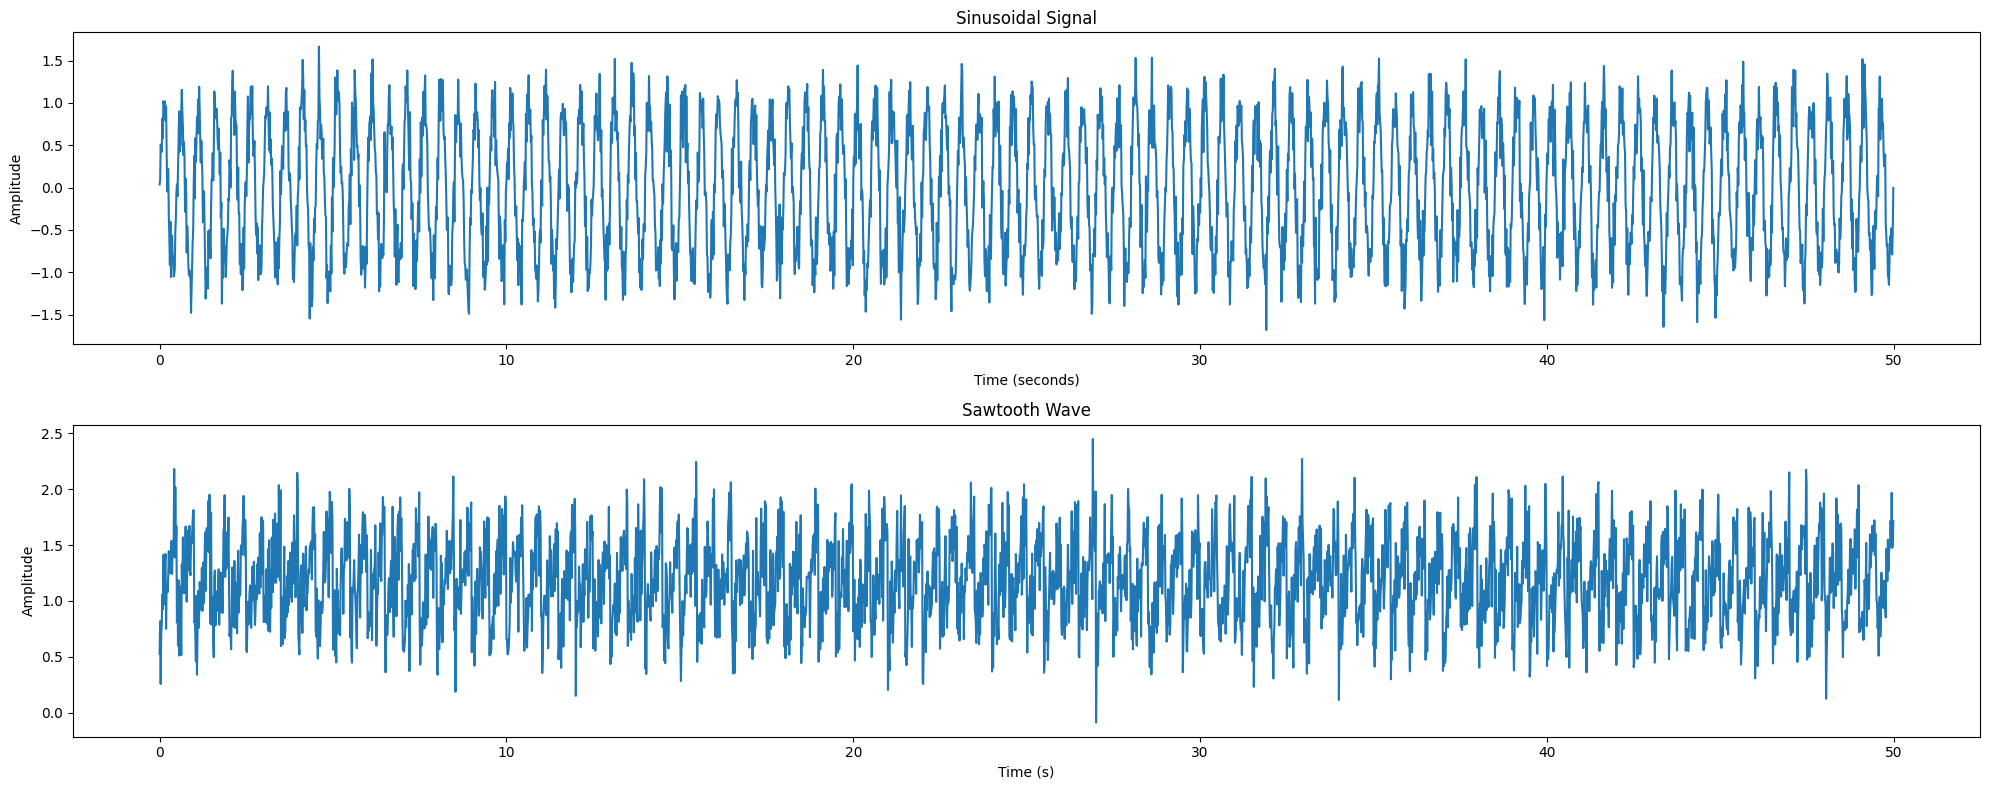

In [ ]:
sine_wave += np.random.normal(0, .2, sine_wave.shape)
sawtooth_wave += np.random.normal(0.1, .2, sawtooth_wave.shape)
syn_seq_len = 100
n=200
fig, axs = plt.subplots(2, 1, figsize=(20, 8))
# Plot the sine wave
axs[0].plot(time, sine_wave)
axs[0].set_xlabel("Time (seconds)")
axs[0].set_ylabel("Amplitude")
axs[0].set_title("Sinusoidal Signal")

# Plot the sawtooth wave
axs[1].plot(time, sawtooth_wave)
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude")
axs[1].set_title("Sawtooth Wave")
plt.tight_layout()

plt.show()

sine_samples = np.zeros((n, syn_seq_len))
sawtooth_samples =  sine_samples.copy()
for i in range(n):
  j = random.randint(0,len(sine_wave)-syn_seq_len)
  sine_samples[i,:]=sine_wave[j:j+syn_seq_len]
  k = random.randint(0,len(sawtooth_wave)-syn_seq_len)
  sawtooth_samples[i,:]=sawtooth_wave[k:k+syn_seq_len]

samples = np.concatenate((sine_samples,sawtooth_samples),axis=0)
labels = np.zeros((2*n,))
labels[n:] = 1
#let's shuffle them and split
idx = np.arange(2*n,dtype=np.int32)
np.random.shuffle(idx)
samples = samples[idx,:]
labels = labels[idx]

#set train and test set indices
train_set =  np.arange(np.round(2*n*0.75),dtype=np.int32)
test_set = np.arange(np.round(2*n*0.75),2*n,dtype=np.int32)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Model definition
model = Sequential([
    LSTM(32, input_shape=(syn_seq_len, 1), return_sequences=False),  # One LSTM layer
    Dense(1, activation='sigmoid')  # Output layer for classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (assuming you have your training data ready)
model.fit(samples[train_set,:], labels[train_set], epochs=10, batch_size=32)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(samples[test_set,:], labels[test_set])
print('Test accuracy:', test_acc)


Epoch 1/10
10/10 [==============================] - 3s 31ms/step - loss: 0.7369 - accuracy: 0.2467
Epoch 2/10
10/10 [==============================] - 0s 31ms/step - loss: 0.6750 - accuracy: 0.6700
Epoch 3/10
10/10 [==============================] - 0s 31ms/step - loss: 0.6062 - accuracy: 0.7267
Epoch 4/10
10/10 [==============================] - 0s 32ms/step - loss: 0.5127 - accuracy: 0.7467
Epoch 5/10
10/10 [==============================] - 0s 31ms/step - loss: 0.3918 - accuracy: 0.8300
Epoch 6/10
10/10 [==============================] - 0s 32ms/step - loss: 0.2269 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 32ms/step - loss: 0.1634 - accuracy: 0.9833
Epoch 8/10
10/10 [==============================] - 0s 32ms/step - loss: 0.1426 - accuracy: 0.9767
Epoch 9/10
10/10 [==============================] - 0s 32ms/step - loss: 0.1346 - accuracy: 0.9733
Epoch 10/10
4/4 [==============================] - 1s 13ms/step - loss: 0.1575 - accuracy: 0.9600
Test accura

Provide your own soulution to this problem. This time, try splitting the data with a k-fold cross validation.

Let's mount google drive and load some toy dataset for polution forecasting

In [ ]:
#download the data from the course google drive
from google.colab import drive
drive.mount("/content/drive/")
!ls ./drive#"My Drive/Colab Notebooks/data"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
ls: cannot access './drive#My Drive/Colab Notebooks/data': No such file or directory


In [ ]:
!ls "./drive/MyDrive/work/code/data" #replace with your path
data_path = "./drive/MyDrive/work/code/data"


LSTM-Multivariate_pollution.csv  pollution_test_data.csv


In [ ]:
weather_data = pd.read_csv(os.path.join(data_path,"LSTM-Multivariate_pollution.csv"))
#let's look at the first few rows
weather_data[:10]

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
5,2010-01-02 05:00:00,109.0,-7,-6.0,1022.0,SE,7.14,3,0
6,2010-01-02 06:00:00,105.0,-7,-6.0,1023.0,SE,8.93,4,0
7,2010-01-02 07:00:00,124.0,-7,-5.0,1024.0,SE,10.72,0,0
8,2010-01-02 08:00:00,120.0,-8,-6.0,1024.0,SE,12.51,0,0
9,2010-01-02 09:00:00,132.0,-7,-5.0,1025.0,SE,14.30,0,0


Let's check the distribution of the target label

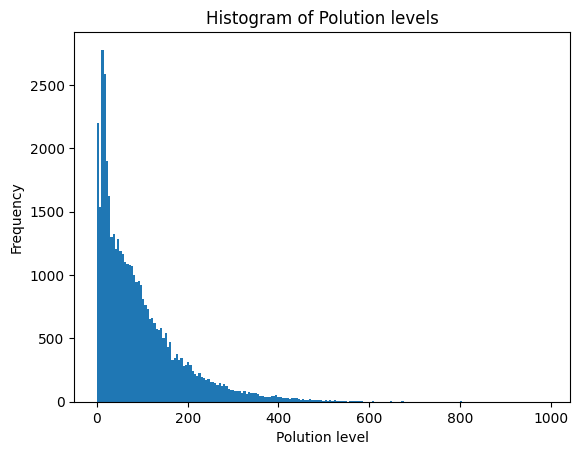

In [ ]:
# Plot the histogram
plt.hist(weather_data['pollution'], bins=100)
plt.xlabel('Polution level')
plt.ylabel('Frequency')
plt.title('Histogram of Polution levels')

# Show the plot
plt.show()



1.   What is the correct number of bins in the histogram above? Please change that value and look a the difference.

2.   How should we quantize this label? Or shall we quantize for forecastintg? What is your rational?





Use the block below to turn columsn 2:8 to features. How should we quantify the wind direction? Do we need to scale them?
Please create a train_labels variable as numpy array and copy the relevant info

Load the test date apply the same transformation to it columns (pollution_test_data.csv).

Devbelop a machine learning model for forecasting the polution level. How should we formulate it? What kind of model is appropriate. What are the parameters and hyperparameters? Develp and evaluate your model.
Visualize the results and input data